In [2]:
import numpy as np
from numpy import linalg
from timeit import default_timer as timer
import scipy.io as spio
import matplotlib.pyplot as plt

In [3]:
def jacobi(error, iterations, A, x_0, b):
    #error is error threshold
    #iterations is number of iterations you want
    #A is structured matrix
    #x_0 is initial guess
    #b is the load vector
    iters=0
    productSum=0
    x_hat=x_0
    start = timer()
    errorList= [np.linalg.norm(np.subtract(A.dot(x_hat),b),np.inf)]
    while(iters<iterations and np.linalg.norm(np.subtract(A.dot(x_hat),b),np.inf)>=error):
        for i in range(len(A)):
            for j in range(len(A)):
                if(i!=j):
                    productSum=productSum+A[i][j]*x_hat[j]
            x_hat[i]=(b[i]-productSum)/A[i][i]
            productSum=0
        iters=iters+1
        errorList.append(np.linalg.norm(np.subtract(A.dot(x_hat),b),np.inf))
      
       
    end = timer()
    elapsedTime=end - start
    return x_hat,iters,elapsedTime,errorList

In [4]:
def getGoodStartVector(A,b,mode):
    #Input is A and b matrices from Ax=b, output is a good initial guess for x
    #mode 0 for zero vector, 1 for bi/aii, 2 for b
    x_start=np.zeros((len(A[0]),1))
    if mode==1:
        for i in range(len(A[0])):
            x_start[i]=b[i]/A[i][i]
    #x_start=np.zeros((len(A[0]),1))
    elif mode==2:
        x_start=b
    return x_start

In [16]:
def gatherData(matrixDataName,startError,iterations,power,mode,filename,load):
    #matrixDataName is the name of the file to be read
    #startError is the intial errorThreshold you want
    #iterations is the number of iterations you want
    #power is the power of ten you want to go up to
    #mode is 0 for zero vector, 1 for good vector, 2 for b (starting vector)
    #filename is the name of the file to save to or to load
    #load False means generate a new matrix, load True means load an existing matrix
    A=spio.mmread(matrixDataName).toarray()
    if(not load):
        #x= (np.amax(A) - np.amin(A)) * np.random.random_sample((len(A[0]),1)) +  np.amin(A)
        x= (10 + 10) * np.random.random_sample((len(A[0]),1)) - 10
        #saves matrix to a txt file to see what it was after
        np.savetxt(filename,x)
    x=np.loadtxt(filename).reshape((len(A[0]), 1))
    b=A.dot(x)
    x_start=getGoodStartVector(A,b,mode)
    error=startError
    for i in range(power):
        newError=error/(10**i)
        x_start=getGoodStartVector(A,b,mode)
        x_hat,iters,elap,errorList=jacobi(newError,iterations, A, x_start, b)
        print("Error Threshold: "+str(newError)+", Initial Error "+str(errorList[0])
              +", Final Error "+str(errorList[-1])
              +", Iterations: "+str(iters)+", Time: "+str(elap)
              +" seconds, Condition number for A: "+str(np.linalg.cond(A, np.inf)))
        plt.plot(errorList)
        plt.ylabel('Error')
        plt.xlabel('Iterations')
        plt.show()

In [6]:
#notes: error threshold should be 0.1, iterations should be 500, power can be 1, 
#mode should be 1 for jacobi 
#mode should be 0 for gauss-seidel and SOR

In [7]:
#to load a certain x matrix, comment out the line x= (10+10)*np.rand... and np.savetxt(... , 
#then change the name of the file in the line x=np.loadtxt(...

Error Threshold: 0.1, Initial Error 11286220.420475053, Final Error 0.0, Iterations: 1, Time: 3.228005899999971 seconds, Condition number for A: 8266217.206972408


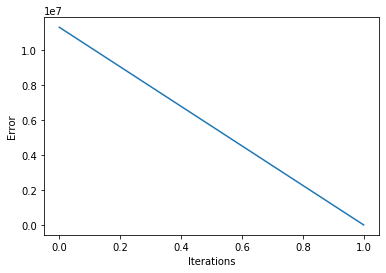

In [17]:
#sparse diagonal with 0 vector
gatherData("bcsstm08.mtx.gz",0.1,500,1,0,"generatedXSparseDiagonal.txt",False)

Error Threshold: 0.1, Initial Error 0.0, Final Error 0.0, Iterations: 0, Time: 0.001231599999982791 seconds, Condition number for A: 8266217.206972408


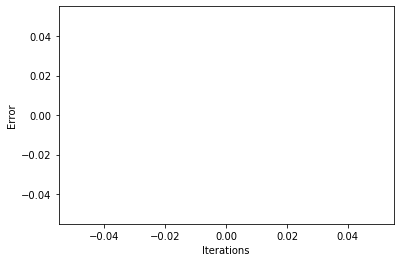

In [19]:
#sparse diagonal with bi/aii vector
gatherData("bcsstm08.mtx.gz",0.1,500,1,1,"generatedXSparseDiagonal.txt",True)

Error Threshold: 0.1, Initial Error 2869957311122790.0, Final Error 533661267794.875, Iterations: 500, Time: 923.6357926000003 seconds, Condition number for A: 281349111831.40924


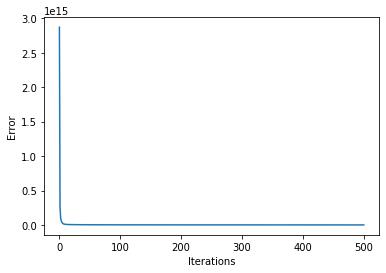

In [20]:
#symmetric with bi/aii vector
gatherData("bcsstk19.mtx.gz",0.1,500,1,1,"generatedXSymmetric.txt",False)

Error Threshold: 0.1, Initial Error 79.8713317506797, Final Error 0.03213135277205481, Iterations: 101, Time: 262.0475112000004 seconds, Condition number for A: 500.19331717910404


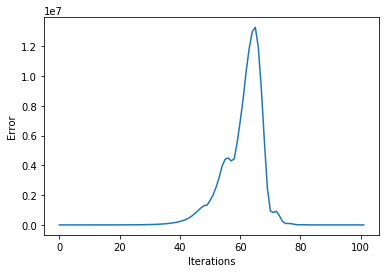

In [30]:
#tridiagonal with the bi/aii vector
gatherData("cdde6.mtx.gz",0.1,500,1,1,"generatedXTridiagonal.txt",False)

Error Threshold: 0.1, Initial Error 163577.94536385097, Final Error 66.78076094164862, Iterations: 500, Time: 1779.9591615000004 seconds, Condition number for A: 12284163.727706052


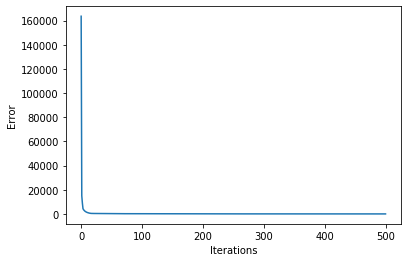

In [22]:
#positive symmetric definite with bi/aii vector
gatherData("1138_bus.mtx.gz",0.1,500,1,1,"generatedXPositiveSymmetricDefinite.txt",False)

Error Threshold: 0.1, Initial Error 50.77994545156089, Final Error 0.09992518547089446, Iterations: 21, Time: 47.37580969999908 seconds, Condition number for A: 377.2333541081076


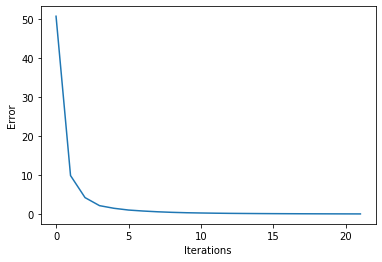

In [32]:
#weak diagonally dominant with bi/aii vector
gatherData("gr_30_30.mtx.gz",0.1,500,1,1,"generatedXWeakDiagonallyDominant.txt",False)

Error Threshold: 0.1, Initial Error 21.921787993921956, Final Error 3.0466984853883335e+36, Iterations: 500, Time: 5.187568600000304 seconds, Condition number for A: 1545.2910230942898


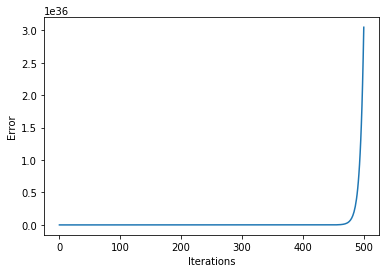

In [41]:
#unsymmetric with bi/aii vector
gatherData("bfw62a.mtx.gz",0.1,500,1,1,"generatedXUnsymmetric.txt",True)

Error Threshold: 0.1, Initial Error 56.82615068019955, Final Error 9.015637332942036e+35, Iterations: 500, Time: 5.065994299999147 seconds, Condition number for A: 1545.2910230942898


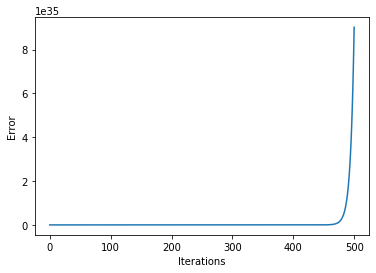

In [42]:
#unsymmetric with zero vector
gatherData("bfw62a.mtx.gz",0.1,500,1,0,"generatedXUnsymmetric.txt",True)

Error Threshold: 0.1, Initial Error 274.84234177407745, Final Error 1.8948429898758656e+192, Iterations: 500, Time: 5.320817200001329 seconds, Condition number for A: 1545.2910230942898


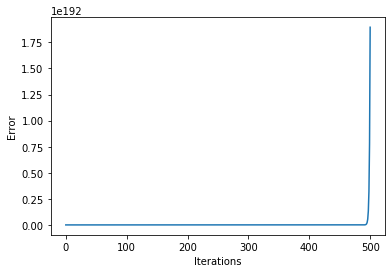

In [43]:
#unsymmetric with b vector
gatherData("bfw62a.mtx.gz",0.1,500,1,2,"generatedXUnsymmetric.txt",True)

Error Threshold: 0.1, Initial Error 73.67944326009874, Final Error 0.08235007603246114, Iterations: 100, Time: 262.36679899999945 seconds, Condition number for A: 500.19331717910404


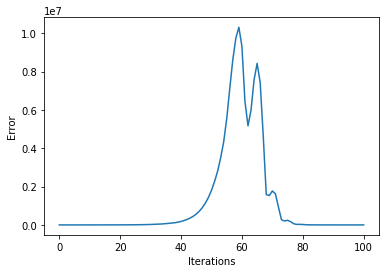

In [46]:
#tridiagonal with the b vector
gatherData("cdde6.mtx.gz",0.1,500,1,0,"generatedXTridiagonal.txt",True)

Error Threshold: 0.1, Initial Error 1734700139129159.5, Final Error 303445842727.75, Iterations: 500, Time: 905.4212748999998 seconds, Condition number for A: 281349111831.40924


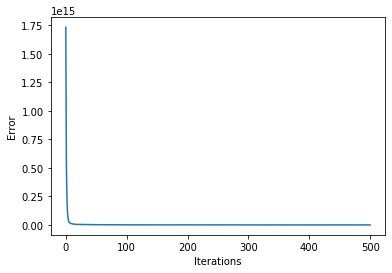

In [50]:
#symmetric with 0 vector
gatherData("bcsstk19.mtx.gz",0.1,500,1,0,"generatedXSymmetric.txt",True)

Error Threshold: 0.1, Initial Error 117.71978877618689, Final Error 0.09685803357212919, Iterations: 22, Time: 51.17860740001197 seconds, Condition number for A: 377.2333541081076


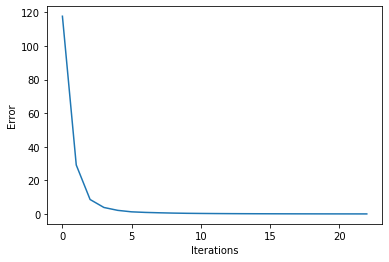

In [51]:
#weak diagonally dominant with 0 vector
gatherData("gr_30_30.mtx.gz",0.1,500,1,0,"generatedXWeakDiagonallyDominant.txt",True)

Error Threshold: 0.1, Initial Error 163919.8208586102, Final Error 63.333808609764674, Iterations: 500, Time: 1791.2173567000136 seconds, Condition number for A: 12284163.727706052


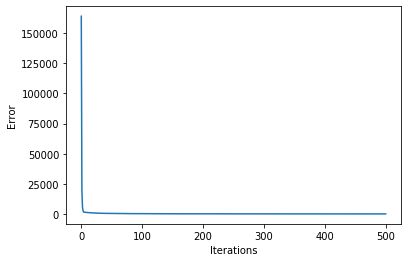

In [52]:
#positive symmetric definite with 0 vector
gatherData("1138_bus.mtx.gz",0.1,500,1,0,"generatedXPositiveSymmetricDefinite.txt",True)

Error Threshold: 0.1, Initial Error 56.82615068019955, Final Error 9.015637332942036e+35, Iterations: 500, Time: 4.97266810000292 seconds, Condition number for A: 1545.2910230942898


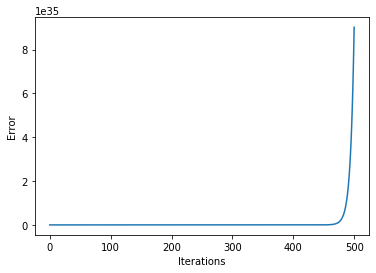

In [53]:
#unsymmetric with 0 vector
gatherData("bfw62a.mtx.gz",0.1,500,1,0,"generatedXUnsymmetric.txt",True)

Error Threshold: 0.1, Initial Error 69.5632606368265, Final Error 0.0458038161607206, Iterations: 102, Time: 248.82592130001285 seconds, Condition number for A: 500.19331717910404


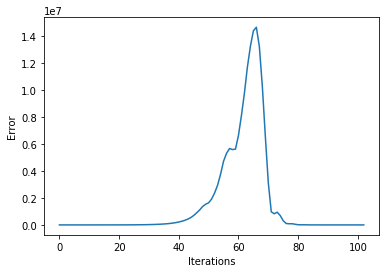

In [54]:
#tridiagonal with the 0 vector
gatherData("cdde6.mtx.gz",0.1,500,1,0,"generatedXTridiagonal.txt",True)